# Value at Risk Analysis

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as reader
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
from datetime import datetime as dt
from scipy.stats import norm
    
# Portfolio stocks
companies = ['AAPL','MSFT', 'GOOG', 'AMZN']		
 
# Portfolio weights 
weights = np.array([.25, .25, .25, .25])
 
# Initial investment level
initial_investment = 1000000
 
# Specifying a timeframe
end = dt.today()
start= dt(end.year - 1, end.month, end.day)  # A year ago

# Data extraction from Yahoo Finance: Apple, Microsoft, Google and Amazon
df_stocks = reader.get_data_yahoo(companies, start, end)
df_stocks

Attributes   Adj Close              ...     Volume           
Symbols           AAPL        MSFT  ...       GOOG       AMZN
Date                                ...                      
2019-12-19   69.405609  154.077759  ...  1469900.0  2652800.0
2019-12-20   69.261856  155.759949  ...  3315000.0  5150800.0
2019-12-23   70.392090  155.759949  ...   883100.0  2136400.0
2019-12-24   70.459007  155.730255  ...   347500.0   881300.0
2019-12-26   71.856941  157.006729  ...   667500.0  6005400.0
...                ...         ...  ...        ...        ...
2020-12-14  121.779999  214.199997  ...  1600200.0  4155800.0
2020-12-15  127.879997  214.130005  ...  1482300.0  3323700.0
2020-12-16  127.809998  219.279999  ...  1513500.0  4427600.0
2020-12-17  128.699997  219.419998  ...  1624700.0  3474300.0
2020-12-18  126.660004  218.589996  ...  4015000.0  5971700.0

[253 rows x 24 columns]

In [2]:
# Keep adjusted closing price  
df_adj_close = df_stocks['Adj Close']
df_adj_close

Symbols,AAPL,MSFT,GOOG,AMZN
Date,,,,
2019-12-19,69.405609,154.077759,1356.040039,1792.280029
2019-12-20,69.261856,155.759949,1349.589966,1786.500000
2019-12-23,70.392090,155.759949,1348.839966,1793.000000
2019-12-24,70.459007,155.730255,1343.560059,1789.209961
2019-12-26,71.856941,157.006729,1360.400024,1868.770020
...,...,...,...,...
2020-12-14,121.779999,214.199997,1760.060059,3156.969971
2020-12-15,127.879997,214.130005,1767.770020,3165.120117
2020-12-16,127.809998,219.279999,1763.000000,3240.959961


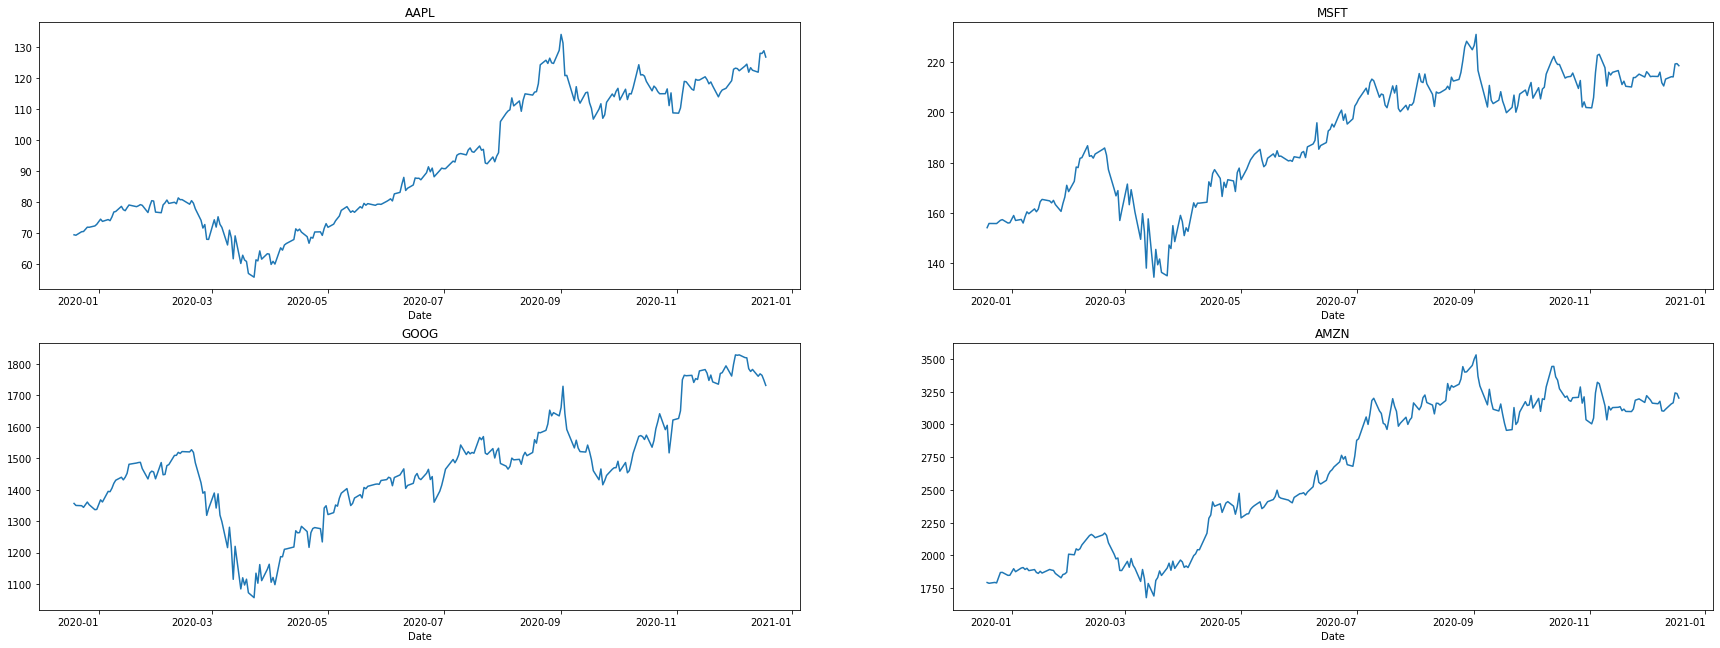

In [3]:
# Plot adjusted closing price of each stock
plt.figure(figsize=(30,12))
for i, company in enumerate(companies, 1):
    plt.subplot(2,2,i)
    df_adj_close[company].plot()
    plt.xticks(rotation=0)
    plt.title(company)

In [4]:
# Daily returns from the adjusting closing prices
returns = df_adj_close.pct_change()
returns

Symbols,AAPL,MSFT,GOOG,AMZN
Date,,,,
2019-12-19,NaN,NaN,NaN,NaN
2019-12-20,-0.002071,0.010918,-0.004757,-0.003225
2019-12-23,0.016318,0.000000,-0.000556,0.003638
2019-12-24,0.000951,-0.000191,-0.003914,-0.002114
2019-12-26,0.019840,0.008197,0.012534,0.044467
...,...,...,...,...
2020-12-14,-0.005147,0.004408,-0.012184,0.013012
2020-12-15,0.050090,-0.000327,0.004381,0.002582
2020-12-16,-0.000547,0.024051,-0.002698,0.023961


In [5]:
# Variance-Covariance matrix
cov_matrix = returns.cov()
cov_matrix

Symbols,AAPL,MSFT,GOOG,AMZN
Symbols,,,,
AAPL,0.000859,0.000681,0.000534,0.000498
MSFT,0.000681,0.000765,0.000570,0.000497
GOOG,0.000534,0.000570,0.000583,0.000401
AMZN,0.000498,0.000497,0.000401,0.000593


In [6]:
# Mean returns of each stock
average_returns = returns.mean()
average_returns

Symbols
AAPL    0.002818
MSFT    0.001771
GOOG    0.001261
AMZN    0.002599
dtype: float64

In [7]:
# Mean returns of portfolio 
portfolio_mean = np.dot(average_returns, weights)
portfolio_mean

0.0021123846898258684

In [8]:
# Portfolio standard deviation
portfolio_std = np.sqrt(np.dot(np.dot(weights.T, cov_matrix), weights))
portfolio_std

0.023931348487488794

In [9]:
# Mean of investment
investment_mean =  initial_investment*(1+portfolio_mean)
investment_mean

1002112.3846898259

In [10]:
# Calculate standard deviation of investmnet
investment_std = initial_investment*portfolio_std
investment_std

23931.348487488794

In [11]:
# Confidence interval (95% recommended by J.P. Morgan)
confidence_level = 0.05

# Inverse of Cumulative Distribution Function: Percentage-Point Function (ppf)
cutoff_point = norm.ppf(confidence_level, investment_mean, investment_std)
cutoff_point

962748.8193323404

In [12]:
# VaR calculation over a one day period
VaR = initial_investment - cutoff_point
print(VaR)

37251.18066765962


Bonus: Adjust VaR value to human-readable format

In [13]:
!pip install millify

In [14]:
from millify import millify
output = millify(VaR, precision=2)
print('The maximum loss expected on the portfolio of 1M USD will not be greater than ' + output + ' USD over a one day period with 95% confidence')

The maximum loss expected on the portfolio of 1M USD will not be greater than 37.25k USD over a one day period with 95% confidence


In [15]:
# Calculate n Day VaR
VaR_array = []
num_days = int(15)
for i in range(1, num_days+1):
    VaR_value = round(VaR*np.sqrt(i), 2)
    VaR_array.append(VaR_value)
    print(str(i) + ' day VaR @ 95% confidence: ' + millify(VaR_value, precision=2) + ' USD')

1 day VaR @ 95% confidence: 37.25k USD
2 day VaR @ 95% confidence: 52.68k USD
3 day VaR @ 95% confidence: 64.52k USD
4 day VaR @ 95% confidence: 74.5k USD
5 day VaR @ 95% confidence: 83.3k USD
6 day VaR @ 95% confidence: 91.25k USD
7 day VaR @ 95% confidence: 98.56k USD
8 day VaR @ 95% confidence: 105.36k USD
9 day VaR @ 95% confidence: 111.75k USD
10 day VaR @ 95% confidence: 117.8k USD
11 day VaR @ 95% confidence: 123.55k USD
12 day VaR @ 95% confidence: 129.04k USD
13 day VaR @ 95% confidence: 134.31k USD
14 day VaR @ 95% confidence: 139.38k USD
15 day VaR @ 95% confidence: 144.27k USD


In [16]:
# Plot n Day VaR curve
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.linspace(1, 15, num=15), y=VaR_array, connectgaps=True))
fig.update_layout(title={'text': 'Max loss expected (VaR) over 15-day period', 'xanchor': 'left', 'yanchor': 'top'},
                                              xaxis=dict(tickvals=np.linspace(1, 15, num=15)),
                                              xaxis_title='Day',
                                              yaxis_title='Max portfolio loss (USD)',
                                              font=dict(size=15), width=800, height=400)
fig.show()
# When we add Jupyter Notebook or IPython Notebook files with a .ipynb extension on GitHub
# they will render as static HTML files in your repository, but plotly graphs  are interactive

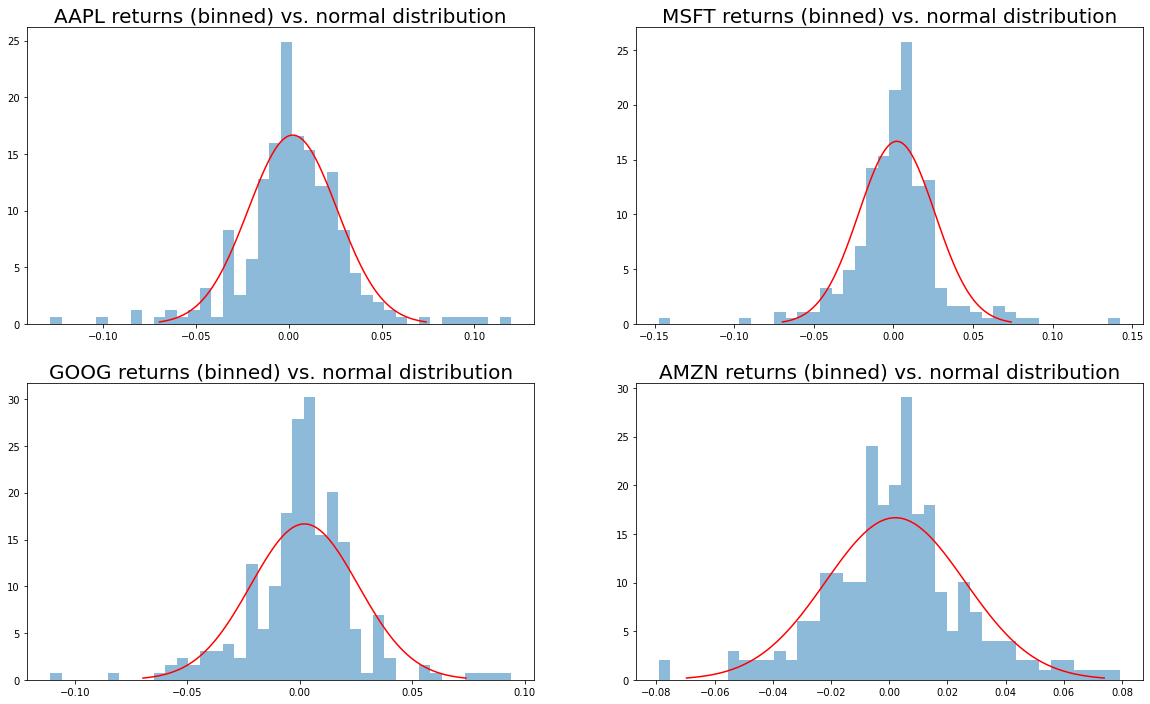

In [17]:
# Plot tickers returns vs. normal distribution
x = np.linspace(portfolio_mean - 3*portfolio_std, portfolio_mean+3*portfolio_std, 100)

plt.figure(figsize=(20,12))
for i, company in enumerate(companies, 1) :
  plt.subplot(2,2,i)
  plt.hist(returns[company], bins=40, density=True, histtype='stepfilled', alpha=0.5)
  plt.plot(x, norm.pdf(x, portfolio_mean, portfolio_std), 'r')
  plt.title(str(company) +' returns (binned) vs. normal distribution', fontsize=20)